In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [52]:
data=pd.read_csv('C:/Users/Manikanta/Machine learning/Home Prices in USA.csv')

### without train_test_split

In [53]:
data.head()

,Unnamed: 0,area,prices
0,0,1000,316404.109589
1,1,1500,384297.945205
2,2,2300,492928.082192
3,3,3540,661304.794521
4,4,4120,740061.643836


In [54]:
data.columns

Index(['Unnamed: 0', 'area', 'prices'], dtype='object')

In [55]:
data=data.drop(columns=("Unnamed: 0"))

In [57]:
data.head()

,area,prices
0,1000,316404.109589
1,1500,384297.945205
2,2300,492928.082192
3,3540,661304.794521
4,4120,740061.643836


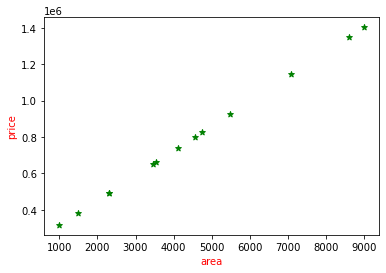

In [58]:
%matplotlib inline
plt.xlabel("area",color="red")
plt.ylabel("price",color="red")
plt.scatter(data.area,data.prices,color="green",marker="*")
# In order to perfrom linear regression we need to first find scatter plot between columns
# well this is good for linear regression

In [59]:
model=LinearRegression()
model.fit(data["area"],data["prices"])

ValueError: Expected 2D array, got 1D array instead:
array=[1000 1500 2300 3540 4120 4560 5490 3460 4750 2300 9000 8600 7100].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [60]:
data["area"].head()  # this is a series

0    1000
1    1500
2    2300
3    3540
4    4120
Name: area, dtype: int64

In [61]:
data[["area"]].head() # this is a dataframe

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [62]:
model=LinearRegression()
model.fit(data[["area"]],data.prices)  # we need to give x_train or x as dataframe i.e data[["area"]] or 2d array but not as series i.e data["area"]

LinearRegression()

In [63]:
model.predict(3300) # in prediction also x_test must be 2d array or dataframe

ValueError: Expected 2D array, got scalar array instead:
array=3300.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [64]:
model.predict([[3300]])

array([628715.75342466])

In [68]:
y_pred=135.78767123*3300+180616.43835616473  # y=mx+c
y_pred

628715.7534151648

In [69]:
model.intercept_  # intercept of y=mx+c

180616.43835616473

In [70]:
model.coef_   # slope of y=mx+c

array([135.78767123])

In [71]:
area=pd.read_csv('C:/Users/Manikanta/Machine learning/Areas.csv')

In [74]:
area.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [75]:
prices=model.predict(area)
prices

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [76]:
area["prices"]=prices

In [77]:
area.head()

,area,prices
0,1000,316404.109589
1,1500,384297.945205
2,2300,492928.082192
3,3540,661304.794521
4,4120,740061.643836


In [79]:
area.to_csv("Areas_predictions.csv",index=False)

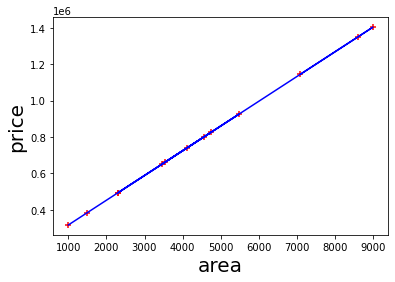

In [86]:
%matplotlib inline
plt.xlabel("area",fontsize=20)
plt.ylabel("price",fontsize=20)
plt.scatter(data.area,data.prices,color="red",marker="+")
plt.plot(area.area,model.predict(area[["area"]]),color="blue")

### using train_test_split

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
data=pd.read_csv('C:/Users/Manikanta/Machine learning/Home Prices in USA.csv')

In [4]:
data=data.drop("Unnamed: 0",axis=1)

In [17]:
data.head()

,area,prices
0,1000,316404.109589
1,1500,384297.945205
2,2300,492928.082192
3,3540,661304.794521
4,4120,740061.643836


In [24]:
x_train,x_test,y_train,y_test=train_test_split(data[["area"]],data["prices"],test_size=0.3,random_state=42)

In [25]:
x_train.shape,y_train.shape

((9, 1), (9,))

In [26]:
x_test.shape,y_test.shape

((4, 1), (4,))

In [27]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [46]:
model.coef_  # here coef_ = "m" i.e. y=mx+c

array([135.78767123])

In [47]:
model.intercept_   # y=mx+c  c=intercept_

180616.4383561646

In [48]:
# y=m*x+c
y_pred=135.78767123*x_test+180616.4383561646
y_pred  

,area
11,1.348390e+06
9,4.929281e+05
0,3.164041e+05
8,8.256079e+05


In [37]:
y_test

11    1.348390e+06
9     4.929281e+05
0     3.164041e+05
8     8.256079e+05
Name: prices, dtype: float64

In [28]:
y_pred=model.predict(x_test)
y_pred

array([1348390.4109589 ,  492928.08219178,  316404.10958904,
        825607.87671233])

In [38]:
mse=mean_squared_error(y_test,y_pred)  
# for regression problems we didn't use accuracy_score,confusion_matrix these are for classification problems
# we use mean_squared_error,mean_absolute_error like that
# if the error is high then the error rate is high i.e. model is not good
mse

3.8116482626443515e-20

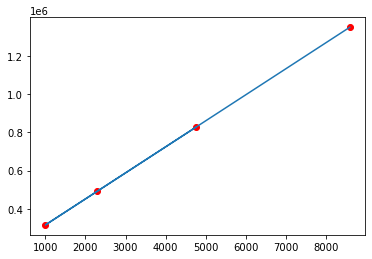

In [49]:
%matplotlib inline
plt.scatter(x_test,y_test,color="red")
plt.plot(x_test,y_pred)

### Exercise

In [88]:
df=pd.read_csv('C:/Users/Manikanta/Machine learning/canada_per_capita_income.csv')

In [89]:
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [90]:
df.shape

(47, 2)

In [91]:
x=df[["year"]]
y=df["per capita income (US$)"]

In [127]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [128]:
x_train.shape,y_train.shape

((37, 1), (37,))

In [129]:
x_test.shape,y_test.shape

((10, 1), (10,))

In [130]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [131]:
y_pred=lr.predict(x_test)
y_pred

array([18602.90731472,  9836.602296  , 33744.7068925 , 13024.34957553,
       28166.14915331, 34541.64371238, 36135.51735215, 10633.53911588,
       11430.47593577,   273.3604574 ])

In [132]:
np.array(y_test)

array([15875.58673 ,  9619.438377, 42665.25597 , 11482.89153 ,
       29198.05569 , 42676.46837 , 35175.18898 , 10416.53659 ,
       10790.32872 ,  3399.299037])

In [133]:
mean_squared_error(y_pred,y_test)

16782853.094032805

In [199]:
lr.predict([[2000]])

array([[1866.60756709]])